In [182]:
# Import the dependencies.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [183]:
# Import the dependencies.
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [184]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [185]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [186]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [187]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [188]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [189]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [190]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

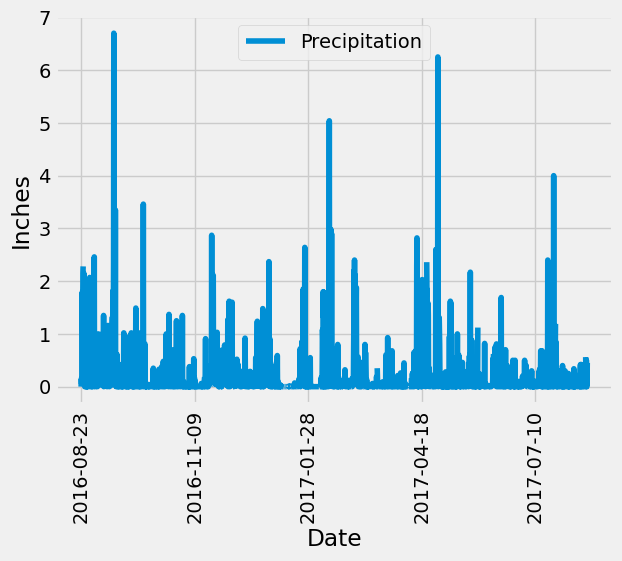

In [191]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_twelve_months = session.query(Measurement.date).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').all()

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.asc()).\
filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipation_df = pd.DataFrame(precip_scores).set_index("date")

# Sort the dataframe by date
precipation_df.sort_values(by=['date'])
precipation_df.rename(columns={"prcp": "Precipitation"}, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipation_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')

plt.show()

In [178]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [150]:
# Design a query to calculate the total number of stations in the dataset
total_station_count = session.query(Station.station).count()
total_station_count

9

In [192]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity_count = session.query(Measurement.station).\
group_by(Measurement.station).all()

station_activity_count 

[('USC00511918',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00516128',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519281',),
 ('USC00519397',),
 ('USC00519523',)]

In [ ]:
station_activity_count = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_activity_count

In [152]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_stats = session.query(func.min(Measurement.tobs),
                           func.max(Measurement.tobs),
                           func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

active_station_stats

[(54.0, 85.0, 71.66378066378067)]

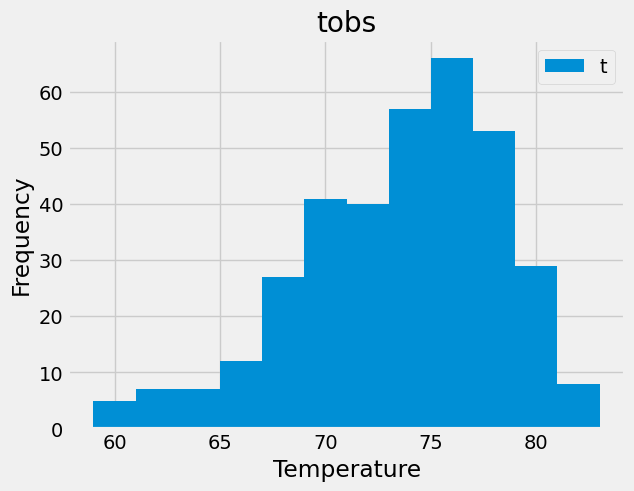

In [154]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').all()

# Creating DataFrame
active_station_df = pd.DataFrame(active_station)
active_station_df

# Plotting histogram
active_station_df.hist(bins=12)
plt.legend('tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()


# Close Session

In [156]:
# Close Session
session.close()